# Evaluation analysis

The aim of the notebook is to analyse the evaluation written by reviews of my projects during the Data Science training at OpenClassRooms.

In [53]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from wordcloud import WordCloud

In [54]:
nltk.download("stopwords")
nltk.download("punkt_tab")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/etienne/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/etienne/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [55]:
# List of words present in the form used for evalution
list_words_form = []

In [56]:
with open("corpus_evaluation.txt", "r") as file:
    corpus = file.read().replace("\n", " ")

len(corpus)

12981

In [57]:
# Lowering
corpus = corpus.lower()

In [58]:
tokenizer = nltk.RegexpTokenizer(r"\b[a-zA-Z]+\b")
tokens_reg = tokenizer.tokenize(corpus)
len(tokens_reg)

1494

In [59]:
tokens = [tok for tok in tokens_reg if len(tok) > 2]
len(tokens)

994

In [60]:
tokens = [tok for tok in tokens if tok not in stopwords.words("french")]
len(tokens)

683

In [61]:
# Fonction displaing a Wordcloud from a list of words
def wordcloud(word_list):
    figure = WordCloud(
        stopwords=stopwords.words("french"), background_color="black"
    ).generate(" ".join(str(x) for x in word_list))
    plt.imshow(figure, interpolation="bilinear")
    plt.axis("off")
    plt.show()

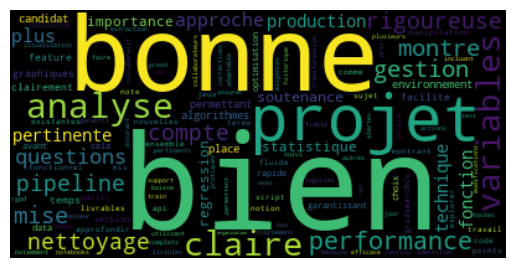

In [62]:
wordcloud(tokens)

In [63]:
 # Stemming
stemmer = nltk.SnowballStemmer("french")
stemmed_corpus = [stemmer.stem(i) for i in tokens]

In [64]:
len(stemmed_corpus)

683

In [65]:
# Word count
freq_stem = {}
for word in stemmed_corpus:
    if word in freq_stem.keys():
        freq_stem[word] += 1
    else:
        freq_stem[word] = 1

In [66]:
# Dataframe conversion
word_freq_stem = pd.DataFrame.from_dict(freq_stem, orient="index")
word_freq_stem.rename(columns={0: "num_of_words"}, inplace=True)
word_freq_stem.sort_values("num_of_words", ascending=False, inplace=True)
word_freq_stem

,num_of_words
bien,41
bon,25
clair,15
projet,13
analys,12
...,...
present,1
pend,1
compris,1
parol,1


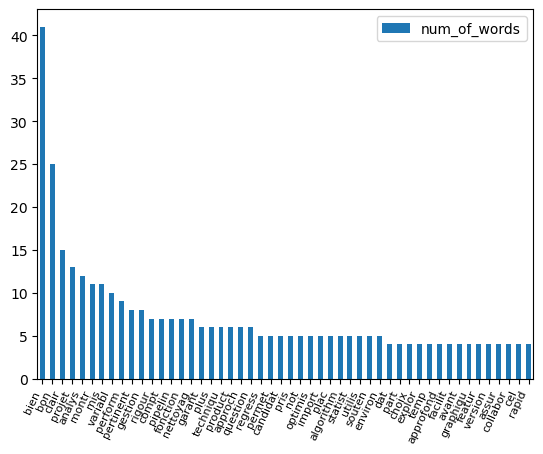

In [67]:
# Plot the higest frequency
word_freq_stem[:50].plot(kind="bar")
plt.xticks(rotation=65, ha="right", fontsize=8)
plt.show()

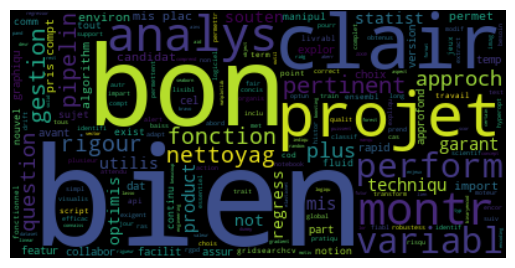

In [68]:
wordcloud(stemmed_corpus)